<a href="https://colab.research.google.com/github/julialejah/DS_CIC/blob/main/Downsapling%26SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importa  librerias y datos (selecciona una muestra)

In [ ]:
import pandas as pd
from google.colab import drive
from csv import reader
drive.mount('/content/gdrive')
pd.set_option('display.max_columns', 50)
import numpy as np
from imblearn.over_sampling import SMOTE


categ_list = ['Benign', 'Infilteration', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'FTP-BruteForce', 'SSH-Bruteforce', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Bot', 'DDoS attacks-LOIC-HTTP']
cont_cat=[13484708, 161934, 1730, 686012, 193360, 187589, 611, 230, 87, 41508, 10990, 139890, 461912, 286191, 576191]
proporcion_categ = [30,3,1,14,4,4,1,1,1,1,2,2,9,6,11] 
 
#154997	1861	20	7885	2223	2156	7	3	1	477	126	1608	5309	3290	6623
proporcion_cont = [1] * 15
muestraDF = pd.DataFrame (columns=['Dst Port',' Protocol',' Timestamp',' Flow Duration',' Tot Fwd Pkts',' Tot Bwd Pkts',' TotLen Fwd Pkts',' TotLen Bwd Pkts',' Fwd Pkt Len Max',' Fwd Pkt Len Min',' Fwd Pkt Len Mean',' Fwd Pkt Len Std',' Bwd Pkt Len Max',' Bwd Pkt Len Min',' Bwd Pkt Len Mean',' Bwd Pkt Len Std',' Flow Byts/s',' Flow Pkts/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min',' Fwd IAT Tot',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min',' Bwd IAT Tot',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min',' Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Len',' Bwd Header Len',' Fwd Pkts/s',' Bwd Pkts/s',' Pkt Len Min',' Pkt Len Max',' Pkt Len Mean',' Pkt Len Std',' Pkt Len Var',' FIN Flag Cnt',' SYN Flag Cnt',' RST Flag Cnt',' PSH Flag Cnt',' ACK Flag Cnt',' URG Flag Cnt',' CWE Flag Count',' ECE Flag Cnt',' Down/Up Ratio',' Pkt Size Avg',' Fwd Seg Size Avg',' Bwd Seg Size Avg',' Fwd Byts/b Avg',' Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',' Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',' Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',' Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']);
muestra = []
#print(muestra.shape)
print(muestra)
#file_list = ['Thursday-01-03-2018_TrafficForML_CICFlowMeter','Wednesday-28-02-2018_TrafficForML_CICFlowMeter']

file_list = ['Friday-02-03-2018_TrafficForML_CICFlowMeter','Friday-16-02-2018_TrafficForML_CICFlowMeter',
             'Friday-23-02-2018_TrafficForML_CICFlowMeter','Thursday-15-02-2018_TrafficForML_CICFlowMeter','Thursday-22-02-2018_TrafficForML_CICFlowMeter',
             'Wednesday-14-02-2018_TrafficForML_CICFlowMeter','Wednesday-21-02-2018_TrafficForML_CICFlowMeter','Wednesday-28-02-2018_TrafficForML_CICFlowMeter',
             'Thursday-01-03-2018_TrafficForML_CICFlowMeter','Tuesday-20-02-2018_TrafficForML_CICFlowMeter']

for i in file_list:
    print("file: "+i)
    with open('gdrive/My Drive/Doctorado/IDS data/'+i+'.csv', 'r') as read_obj: 
        csv_reader = reader(read_obj)
        header = next(csv_reader)
        if header != None:
            # Iterate over each row after the header in the csv
            for row in csv_reader:
                if row [-1] == 'SQL Injection' or row [-1] == 'Brute Force -Web' or row [-1] == 'Brute Force -XSS' :
                    muestra.append(row)
                elif row [-1] != 'Label' and proporcion_cont[categ_list.index(row [-1])] == 1:
                    if i == 'Tuesday-20-02-2018_TrafficForML_CICFlowMeter':
                        muestra.append(row[4:84])
                    else:
                        muestra.append(row)
                    proporcion_cont[categ_list.index(row [-1])] = proporcion_categ[categ_list.index(row [-1])]+1
                elif row [-1] != 'Label':
                    proporcion_cont[categ_list.index(row [-1])] = proporcion_cont[categ_list.index(row [-1])]-1;  


muestraDF = pd.DataFrame (data=muestra,columns=['Dst Port',' Protocol',' Timestamp',' Flow Duration',' Tot Fwd Pkts',' Tot Bwd Pkts',' TotLen Fwd Pkts',' TotLen Bwd Pkts',' Fwd Pkt Len Max',' Fwd Pkt Len Min',' Fwd Pkt Len Mean',' Fwd Pkt Len Std',' Bwd Pkt Len Max',' Bwd Pkt Len Min',' Bwd Pkt Len Mean',' Bwd Pkt Len Std',' Flow Byts/s',' Flow Pkts/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min',' Fwd IAT Tot',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min',' Bwd IAT Tot',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min',' Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Len',' Bwd Header Len',' Fwd Pkts/s',' Bwd Pkts/s',' Pkt Len Min',' Pkt Len Max',' Pkt Len Mean',' Pkt Len Std',' Pkt Len Var',' FIN Flag Cnt',' SYN Flag Cnt',' RST Flag Cnt',' PSH Flag Cnt',' ACK Flag Cnt',' URG Flag Cnt',' CWE Flag Count',' ECE Flag Cnt',' Down/Up Ratio',' Pkt Size Avg',' Fwd Seg Size Avg',' Bwd Seg Size Avg',' Fwd Byts/b Avg',' Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',' Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',' Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',' Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']);
print(muestraDF.shape)


Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[]
file: Friday-02-03-2018_TrafficForML_CICFlowMeter
file: Friday-16-02-2018_TrafficForML_CICFlowMeter
file: Friday-23-02-2018_TrafficForML_CICFlowMeter
file: Thursday-15-02-2018_TrafficForML_CICFlowMeter
file: Thursday-22-02-2018_TrafficForML_CICFlowMeter
file: Wednesday-14-02-2018_TrafficForML_CICFlowMeter
file: Wednesday-21-02-2018_TrafficForML_CICFlowMeter
file: Wednesday-28-02-2018_TrafficForML_CICFlowMeter
file: Thursday-01-03-2018_TrafficForML_CICFlowMeter
file: Tuesday-20-02-2018_TrafficForML_CICFlowMeter
(805334, 80)


#Adapta los datos

In [ ]:
muestraDF=muestraDF.drop(columns=[' Timestamp'])
nom_cols=['Dst Port',' Protocol',' Flow Duration',' Tot Fwd Pkts',' Tot Bwd Pkts',' TotLen Fwd Pkts',' TotLen Bwd Pkts',' Fwd Pkt Len Max',' Fwd Pkt Len Min',' Fwd Pkt Len Mean',' Fwd Pkt Len Std',' Bwd Pkt Len Max',' Bwd Pkt Len Min',' Bwd Pkt Len Mean',' Bwd Pkt Len Std',' Flow Byts/s',' Flow Pkts/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min',' Fwd IAT Tot',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min',' Bwd IAT Tot',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min',' Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Len',' Bwd Header Len',' Fwd Pkts/s',' Bwd Pkts/s',' Pkt Len Min',' Pkt Len Max',' Pkt Len Mean',' Pkt Len Std',' Pkt Len Var',' FIN Flag Cnt',' SYN Flag Cnt',' RST Flag Cnt',' PSH Flag Cnt',' ACK Flag Cnt',' URG Flag Cnt',' CWE Flag Count',' ECE Flag Cnt',' Down/Up Ratio',' Pkt Size Avg',' Fwd Seg Size Avg',' Bwd Seg Size Avg',' Fwd Byts/b Avg',' Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',' Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',' Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',' Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
y=muestraDF.iloc[:,-1]
X=muestraDF.iloc[:,0:78]

print(X.isna().values.any())


False


(805334, 78)


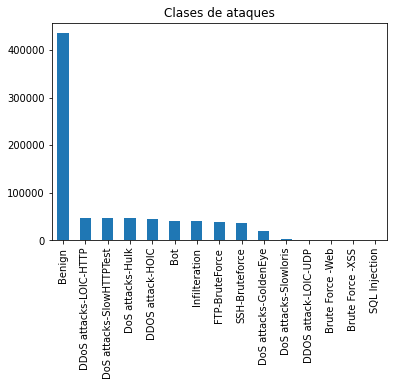

In [ ]:
print(X.shape)
plot = muestraDF['Label'].value_counts().plot(kind='bar',
                                            title='Clases de ataques')


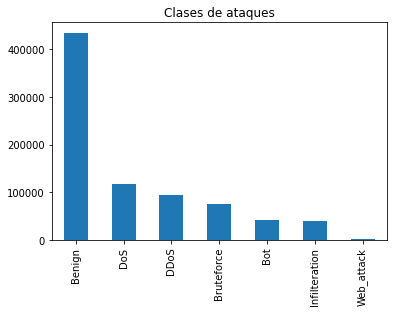

In [ ]:
y=y.replace (['DDOS attack-LOIC-UDP', 'DDOS attack-HOIC','DDoS attacks-LOIC-HTTP'],'DDoS')
y=y.replace (['Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],'Web_attack')
y=y.replace (['FTP-BruteForce', 'SSH-Bruteforce'],'Bruteforce')
y=y.replace (['DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk'],'DoS')

plot = y.value_counts().plot(kind='bar',
                                            title='Clases de ataques')


In [ ]:
print(X.isna().values.any())

False


In [ ]:
X = X.replace([np.inf, -np.inf], np.nan)
print(X.isna().values.any())

for i in nom_cols:
    X[i]=pd.to_numeric(X[i], errors='coerce')

print(X.isna().values.any())


False
True


In [ ]:
X = X.replace([np.inf, -np.inf], np.nan)
print(X.isna().values.any())
print(X.isnull().values.any())


True
True


In [ ]:

for i in nom_cols:
    X[i]=pd.to_numeric(X[i], errors='coerce')
    X[i]=pd.DataFrame(X[i]).fillna(X[i].mean())

print(X.isna().values.any())

from collections import Counter
counter = Counter(y)
print(counter)
print(counter['Web_attack'])
counter['Web_attack']=16000
print(counter['Web_attack'])

False
Counter({'Benign': 434991, 'DoS': 117240, 'DDoS': 94616, 'Bruteforce': 76190, 'Bot': 40885, 'Infilteration': 40484, 'Web_attack': 928})
928
16000


#SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(820406, 78)
Counter({'Benign': 434991, 'DoS': 117240, 'DDoS': 94616, 'Bruteforce': 76190, 'Bot': 40885, 'Infilteration': 40484, 'Web_attack': 16000})


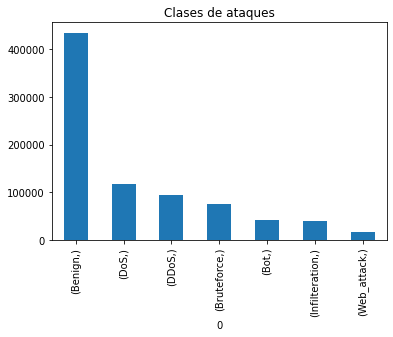

In [ ]:
sm = SMOTE(sampling_strategy = {'Web_attack':16000})
X_smote, y_smote = sm.fit_resample(X, y)
print(X_smote.shape)
plot = pd.DataFrame(data=y_smote).value_counts().plot(kind='bar',
                                            title='Clases de ataques')
counter = Counter(y_smote)
print(counter)

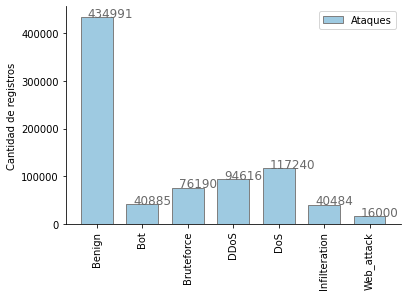

In [ ]:
import matplotlib.pylab as plt

lists = sorted(counter.items()) # sorted by key, return a list of tuples

x_bar, y_bar = zip(*lists) # unpack a list of pairs into two tuples
barWidth = 0.7

labelsP = y_bar
plt.bar(x_bar, y_bar, width = barWidth, color = '#9ECAE1', edgecolor = 'grey', capsize=7, label='Ataques')
for i in range(len(y_bar)):
    plt.text(x = i-0.2, y = y_bar [i]+10, s = labelsP[i], size = 12, color='dimgrey')

plt.xticks(x_bar)
plt.xticks(rotation=90)
plt.ylabel('Cantidad de registros')
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [ ]:
#tot=np.concatenate((X_smote, y_smote))
X_df=pd.DataFrame(data=X_smote)
y_df=pd.DataFrame(data=y_smote)

tot=pd.concat([X_df,y_df], axis=1)
print(X_df.shape)
print (pd.unique(y_df.squeeze()))



(820406, 78)
['Benign' 'Bot' 'DoS' 'Web_attack' 'Bruteforce' 'DDoS' 'Infilteration']


In [ ]:
tot.to_csv(r'gdrive/My Drive/Doctorado/IDS data/DF_peq_full.csv', index = False)